In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [107]:
df=pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [108]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['weather']=encoder.fit_transform(df['weather'])
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [109]:
df['date']=pd.to_datetime(df['date'])

In [110]:
df=df.set_index(df['date'])
df

,date,precipitation,temp_max,temp_min,wind,weather
date,,,,,,
2012-01-01,2012-01-01,0.0,12.8,5.0,4.7,0
2012-01-02,2012-01-02,10.9,10.6,2.8,4.5,2
2012-01-03,2012-01-03,0.8,11.7,7.2,2.3,2
2012-01-04,2012-01-04,20.3,12.2,5.6,4.7,2
2012-01-05,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
2015-12-27,2015-12-27,8.6,4.4,1.7,2.9,2
2015-12-28,2015-12-28,1.5,5.0,1.7,1.3,2
2015-12-29,2015-12-29,0.0,7.2,0.6,2.6,1


In [111]:
df=df.drop(columns=['date'],axis=1)
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,0
2012-01-02,10.9,10.6,2.8,4.5,2
2012-01-03,0.8,11.7,7.2,2.3,2
2012-01-04,20.3,12.2,5.6,4.7,2
2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,2
2015-12-28,1.5,5.0,1.7,1.3,2
2015-12-29,0.0,7.2,0.6,2.6,1


In [112]:
features=['precipitation',	'temp_max'	,'temp_min',	'wind'	,'weather']

In [113]:
X=df[features].values
y=df[features].values

In [114]:
n_input_features=len(features)
n_output_features=len(features)

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
y_scaled=scaler.fit_transform(y)

In [116]:
def sequences(X,y,time_steps=1):
  X_seq,y_seq=[],[]

  for i in range(len(X)-time_steps):
    X_seq.append(X[i:i+time_steps])
    y_seq.append(y[i+time_steps])
  return np.array(X_seq),np.array(y_seq)

In [117]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,shuffle=False)

In [118]:
ts=7
X_train_seq,y_train_seq=sequences(X_train,y_train,ts)
X_test_seq,y_test_seq=sequences(X_test,y_test,ts)

In [119]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(ts,n_input_features)))
model.add(LSTM(units=30,return_sequences=False))
model.add(Dense(n_output_features))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [120]:
model.compile(optimizer='adam',loss='mse')

In [121]:
history=model.fit(X_train_seq,y_train_seq,validation_data=(X_test_seq,y_test_seq),epochs=100)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - loss: 0.1566 - val_loss: 0.0334
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0303 - val_loss: 0.0280
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0277 - val_loss: 0.0274
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - val_loss: 0.0272
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0268 - val_loss: 0.0271
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - val_loss: 0.0272
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0256 - val_loss: 0.0273
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - val_loss: 0.0269
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0282 - val_loss: 0.0275
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0268 - val_loss: 0.0267
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0258 - val_loss: 0.0270
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step -

In [122]:
y_pred=model.predict(X_test_seq)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [123]:
y_pred_invers=scaler.inverse_transform(y_pred)

In [124]:
y_test_invers=scaler.inverse_transform(y_test_seq)

In [125]:
data_export={
    'Prediksi':y_pred_invers[:,4],
    'Aktual':y_test_invers[:,4]
}
data=pd.DataFrame(data_export)
data.to_excel('test.xlsx')

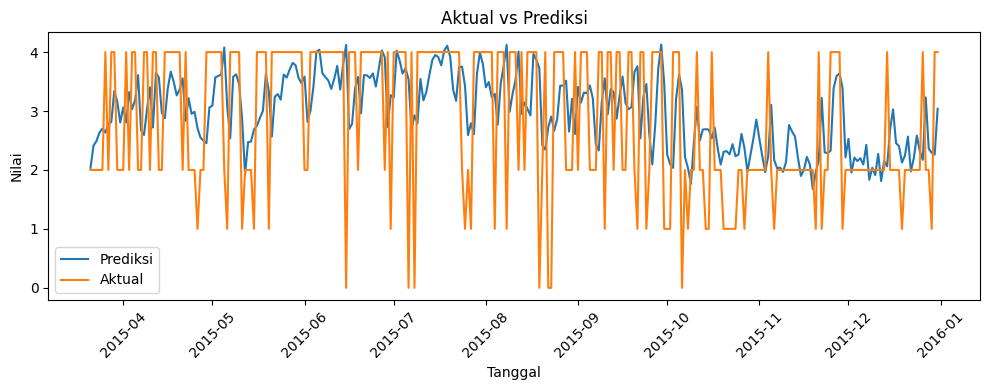

In [126]:
import matplotlib.pyplot as plt

# Pastikan Anda menggunakan index tanggal dari DataFrame Anda
plt.figure(figsize=(10, 4))
plt.plot(df.index[-len(y_pred_invers):], y_pred_invers[:, 4], label='Prediksi')  # Menggunakan index untuk prediksi
plt.plot(df.index[-len(y_test_invers):], y_test_invers[:, 4], label='Aktual')  # Menggunakan index untuk aktual

# Tambahkan label untuk sumbu X dan Y serta judul
plt.xlabel('Tanggal')  # Label untuk sumbu X
plt.ylabel('Nilai')    # Label untuk sumbu Y
plt.title('Aktual vs Prediksi')  # Judul grafik

# Tambahkan legend
plt.legend()

# Atur format tanggal (opsional, jika perlu)
plt.xticks(rotation=45)  # Memutar label sumbu X untuk keterbacaan
plt.tight_layout()  # Menjaga layout tetap rapi
plt.show()
